Object `np.isno*` not found.


In [37]:
# 控制单元格显示
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# 这行代码的作用是：当文档作为HTML格式输出时，将会默认隐藏输入单元格。
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# 这行代码将会添加“Toggle code”按钮来切换“隐藏/显示”输入单元格。
# di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">代码显示切换</button>''', raw=True)

In [38]:
#coding:utf-8
# author: thoughtworks bigdata-team zhaozhi

In [ ]:
# 执行以下命令，安装jupyter插件，方便浏览目录和单元格管理（执行一次后可以删除）
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!pip install jupyter_nbextensions_configurator
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user

# 示例数据选择原则
   
   尽量采取常见的，对多数人都可以直接理解的分析场景，聚焦于数据技能和知识，而不是领域知识（尽管在具体项目中领域知识很重要）。  
   陈述中，‘字段’和‘变量’意义相同，一般都都代表列数据。


# 数据分析处理逻辑说明
这是一份早期公开的数据挖掘建模数据，初始的研究目标是根据数据中所记载的多个基本人口情况和个人经济状况字段，能否建立有效的模型，预测出对可以的某种产品推荐是否成功——字段 y 记录了推销是否成功的状态。用数据挖掘的数据，y为目标变量，其他为输入。后续补充了一些宏观经济指标。  
如果从通常的业务逻辑驱动思考，我们可以从不同的角度提取不同的问题，从而衍生出更多的分析主题，例如：

> - 以个人贷款特征为目标，研究什么特征的人会进行个人贷款？或者研究不同贷款等级的人，是否有不同的特征
- 数据中有多次推销活动的间隔数据，那么另外的主题，可以研究产品推销的间隔长度是否会影响到成功率
- 对之前营销的态度，能否推测对本次营销的推测。
- 能否根据几次的营销结果，构造出客户的营销接受倾向得分  

我们可以发现，只要数据给出的信息维度足够多，我们可以衍生出很多分析主题。另外，如果我们考虑到多种指标的联合效果，发现这种方法可组合出的分析主题数量之多，远超过我们的预想。  
传统的分析方式，会用业务意义直接过滤掉了大部分交叉，另外对于交叉维度的分析，也会自动限制在3个维度之内，这样就有效降低了分析组合的复杂度。例如，本文件中，从业务的角度出发，可能会提出**“综合考虑到客户的个人贷款以及收入情况两个因素，是否可以有效推断这次产品推销是否成功”**的问题，这个分析里面涉及到了三个维度的变量，个人贷款、收入、推销是否成功。传统的市场分析报告中，很少会看到超过三种维度的问题研究设计，无论是以业务的语言，还是以数据分析的语言陈述的。  
作为数据分析人员，如果有效的利用工具，理论上可以不受到这种限制，我们可以探究数据中任意维度之间的关系，然后从中筛选有价值的关系模式。这方面，限制我们的更多的是人的理解力，而不是工具的能力。
数据分析师应该有能力快速的探索数据中的各种关系模式，至于如何解读和展现哪些，是否需要展现，决定于基于业务场景和自己的判断。

当前乃至今后，多数数据场景下都会有比较多的变量，基于半手工的，业务驱动的逻辑逐项去探究数据的关系，是低效率的，所以，本数据探索练习模版系列，主要目的在于搜索和演示能快速探索多变量之间的关系模式的方法。  

- **前面的系列主要在快速了解和探索数据标准信息，字段间的关系。后续会逐渐补充一些复杂分析场景，还有一些算法模型的综合运用。**

# "示例数据"基本信息  
  --- 

# 演示数据字段说明
---

'''
    <font size=4> 银行业营销数据。最后一个字段记录营销是否成功。前面为一些特征和交互项输入。模板中为便于理解，后面会把名字更新成为中文，但项目中应如果可能尽量使用英文字段名称，可提前避免很多编码问题。</font>
    - 分析主题  
    - 成功几率分析  
    - 营销成功因素影响
    - 下面为字段信息，更详细信息文件末尾

    __Input variables:__  
    __bank client data:__  
    1. age (numeric)
    2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
    4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    5. default: has credit in default? (categorical: "no","yes","unknown")
    6. housing: has housing loan? (categorical: "no","yes","unknown")
    7. loan: has personal loan? (categorical: "no","yes","unknown")  
    __related with the last contact of the current campaign:__
    8. contact: contact communication type (categorical: "cellular","telephone") 
    9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
    11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.   
    __other attributes:__
    12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14. previous: number of contacts performed before this campaign and for this client (numeric)
    15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
    __social and economic context attributes__
    16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17. cons.price.idx: consumer price index - monthly indicator (numeric)     
    18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    19. euribor3m: euribor 3 month rate - daily indicator (numeric)
    20. nr.employed: number of employees - quarterly indicator (numeric)  
    __Output variable (desired target):__
    21. y - has the client subscribed a term deposit? (binary: "yes","no")

    - Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. 
    These missing values can be treated as a possible class label or using deletion or imputation techniques.
'''


In [1]:
# 导入需要模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#哈佛大学Data Science课程CS109推荐的matplotlib默认设置
from matplotlib import rcParams #图片大小
rcParams['figure.figsize'] = (10, 6) 
rcParams['figure.dpi'] = 100 #图片精度
rcParams['lines.linewidth'] = 2 #线宽
rcParams['axes.grid'] = True #axes #是否显示网格
rcParams['axes.facecolor'] = '#eeeeee' #填充颜色为浅灰
rcParams['font.size'] = 14  #字体大小为14
rcParams['patch.edgecolor'] = 'none'#边框为无色

import seaborn as sns  # 封装matplotlib图形包，语法简单
import missingno as msno # 缺失值可视化分析模块

# 获取数据

In [2]:
 # 根据数据位置更新读取目录
# DD_data=pd.read_csv("/Users/zhizhao/data/bankMarket/bank-additional-full.csv",sep=";")
DD_data=pd.read_csv("./bankMarket/bank-additional-full.csv",sep=";")

# 生成数据概要
获得数据中字段的名称，记录数量，字段类型等基本信息。

In [41]:
DD_data.info() #通过info函数获得数据概况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
# 更改名称到中文 目标变量命名为 “target”
DD_data_china=DD_data.rename(index=str, columns={
"age":"年龄",
"job":"工作类型",
"marital":"婚姻状态",
"education":"教育等级",
"default":"信用卡负债",
"housing":"有房贷",
"loan":"个人贷款",
"contact":"联系类型",
"month":"上次联系月份",
"day_of_week":"上次联系周几",
"duration":"最后联系通话时长(秒)",
"campaign":"之前活动联络次数",
"pdays":"上次营销距今天数",
"previous":"前次活动联系次数",
"poutcome":"前次结果",
# "emp.var.rate":""
# "cons.price.idx":""
# "cons.conf.idx":""
# "euribor3m":""
# "nr.employed":""
"y":"target"})

del DD_data # 删除原始数据

## 抽样
数据量较大时，为了快速研究字段之间的关系模式，观察各种可视化模型，应该对数据进行抽样，使用样本进行研究。

In [4]:
# 按照2：8 随机拆分数据
from sklearn.model_selection import train_test_split
DD_data_china_train, DD_data_china_test = train_test_split(DD_data_china, test_size=0.2, random_state=42)

## 缺失值检测
>现实的数据没有完美情况，缺失值检测是处理不可避免的。很多时候缺失值检查不能简单的填充或删除，而需要先考察模式，再酌情处理。missingno提供了丰富的方式探查数据，并且有很好的可视化展现，方便结果的展现和交流。

In [5]:
# 填充一个缺失值字段进行演示
import warnings
warnings.filterwarnings("ignore") # 屏蔽警告
DD_data_china_test["miss_test"]=np.random.randint(1,100,len(DD_data_china_test))
# DD_data_china_test["miss_test"][DD_data_china_test["miss_test"]<50]=None
DD_data_china_test.loc[DD_data_china_test.miss_test<30,"miss_test"]=None

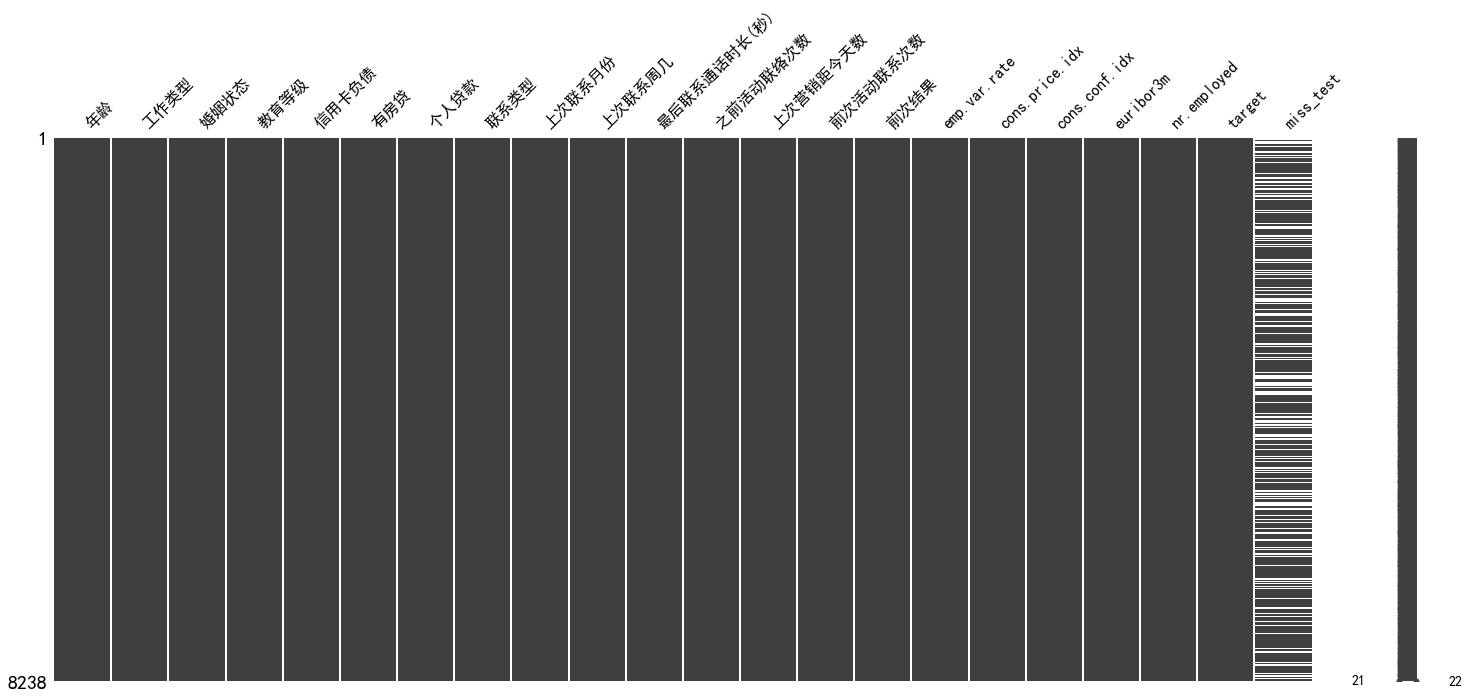

In [6]:
msno.matrix(DD_data_china_test); # 缺失矩阵图
# msno.bar(DD_data_china_test); # 缺失值条形图
DD_data_china_test.drop("miss_test",axis=1); # 清理填充测试字段加 加分号不显示最后一行处理结果

In [7]:
DD_data_china_test.describe()

,年龄,最后联系通话时长(秒),之前活动联络次数,上次营销距今天数,前次活动联系次数,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,miss_test
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,5848.000000
mean,40.050619,260.439670,2.546128,961.395970,0.172857,0.077009,93.570981,-40.454710,3.615664,5166.803375,64.174419
std,10.363269,258.560066,2.737337,189.545815,0.502495,1.574836,0.577581,4.650165,1.737388,71.841588,20.288597
min,17.000000,2.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,30.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,47.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,64.000000
75%,47.000000,324.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,82.000000
max,94.000000,3509.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99.000000


In [8]:
# 这个数据是开发的数据挖掘研究数据，已经事先处理，所以基本没有缺失值。为了演示，下面随机删除一些数据做展示
DD_data_china_test.loc[:,"miss_test"]=np.random.rand()

In [9]:
# 去除空值过多的变量函数,默认缺失40%以上排除
def nan_remove(data, rate_base=0.4):
    all_cnt = data.shape[0]
    avaiable_index = []
    for i in range(data.shape[1]):
        rate = np.isnan(np.array(data.iloc[:, i])).sum() / all_cnt
        if rate <= rate_base:
            avaiable_index.append(i)
    data_available = data.iloc[:, avaiable_index]
    return data_available, avaiable_index

## 生成分类和连续变量列表

In [10]:
num_list=list(DD_data_china.describe(exclude="object").columns) # 连续变量列表
cat_list=list(DD_data_china.describe(include="object").columns) # 分类变量列表

## 数值数据概要
获得数值类变量的概要信息，计数，均值、标准差、分位数等。

In [11]:
DD_data_china.describe() # 默认输出所有数值变量信息

,年龄,最后联系通话时长(秒),之前活动联络次数,上次营销距今天数,前次活动联系次数,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 分类数据概要

### 分类数据总体概要
获得分类字段的内容统计频数

In [12]:
DD_data_china.describe(include="object") # 分类数据概要

,工作类型,婚姻状态,教育等级,信用卡负债,有房贷,个人贷款,联系类型,上次联系月份,上次联系周几,前次结果,target
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### 每个分类字段分别统计

In [13]:
[print( DD_data_china[temp].value_counts(),"\n","="*50) for temp in cat_list]; # 分类数据详细频数

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: 工作类型, dtype: int64 
married     24928
single      11568
divorced     4612
unknown        80
Name: 婚姻状态, dtype: int64 
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: 教育等级, dtype: int64 
no         32588
unknown     8597
yes            3
Name: 信用卡负债, dtype: int64 
yes        21576
no         18622
unknown      990
Name: 有房贷, dtype: int64 
no         33950
yes         6248
unknown      990
Name: 个人贷款, dtype: int64 
cellular     26144
telephone    15044
Name: 联系类型, dtype: int64 
may    13769
jul     7174
aug     6178
jun     

# 连续数据关系分析
## 相关性

In [52]:
# 重刷新matplotlib 字体配置缓冲,一般临时改过配置时候需要
# from matplotlib.font_manager import _rebuild
# _rebuild()

In [53]:
# 获得连续变量相关系数矩阵
corr = DD_data_china.corr()

In [54]:
# 填充对角线
# corr=(np.array(corr)) #如果需要填充矩阵对角线，数据框转化为array
# np.fill_diagonal(corr, 0)  # 对角线无意义，填充为0

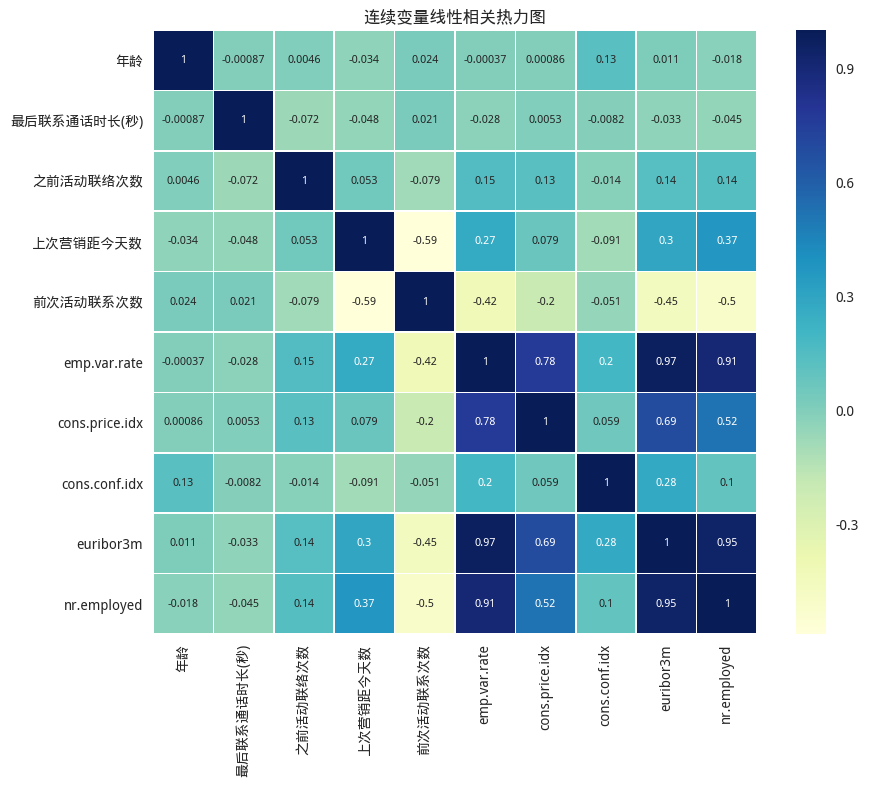

In [86]:
# 绘制相关系数热力图
f, ax = plt.subplots(figsize=(10, 8))
plt.rcParams["font.size"]=8
plt.xticks(rotation='90')
plt.title("连续变量线性相关热力图")
sns.heatmap(corr, square=True, linewidths=.5, annot=True,cmap="YlGnBu") # cmap参数控制颜色
plt.show()

## 分布直方图
直方图经来观察连续变量的分布情况。

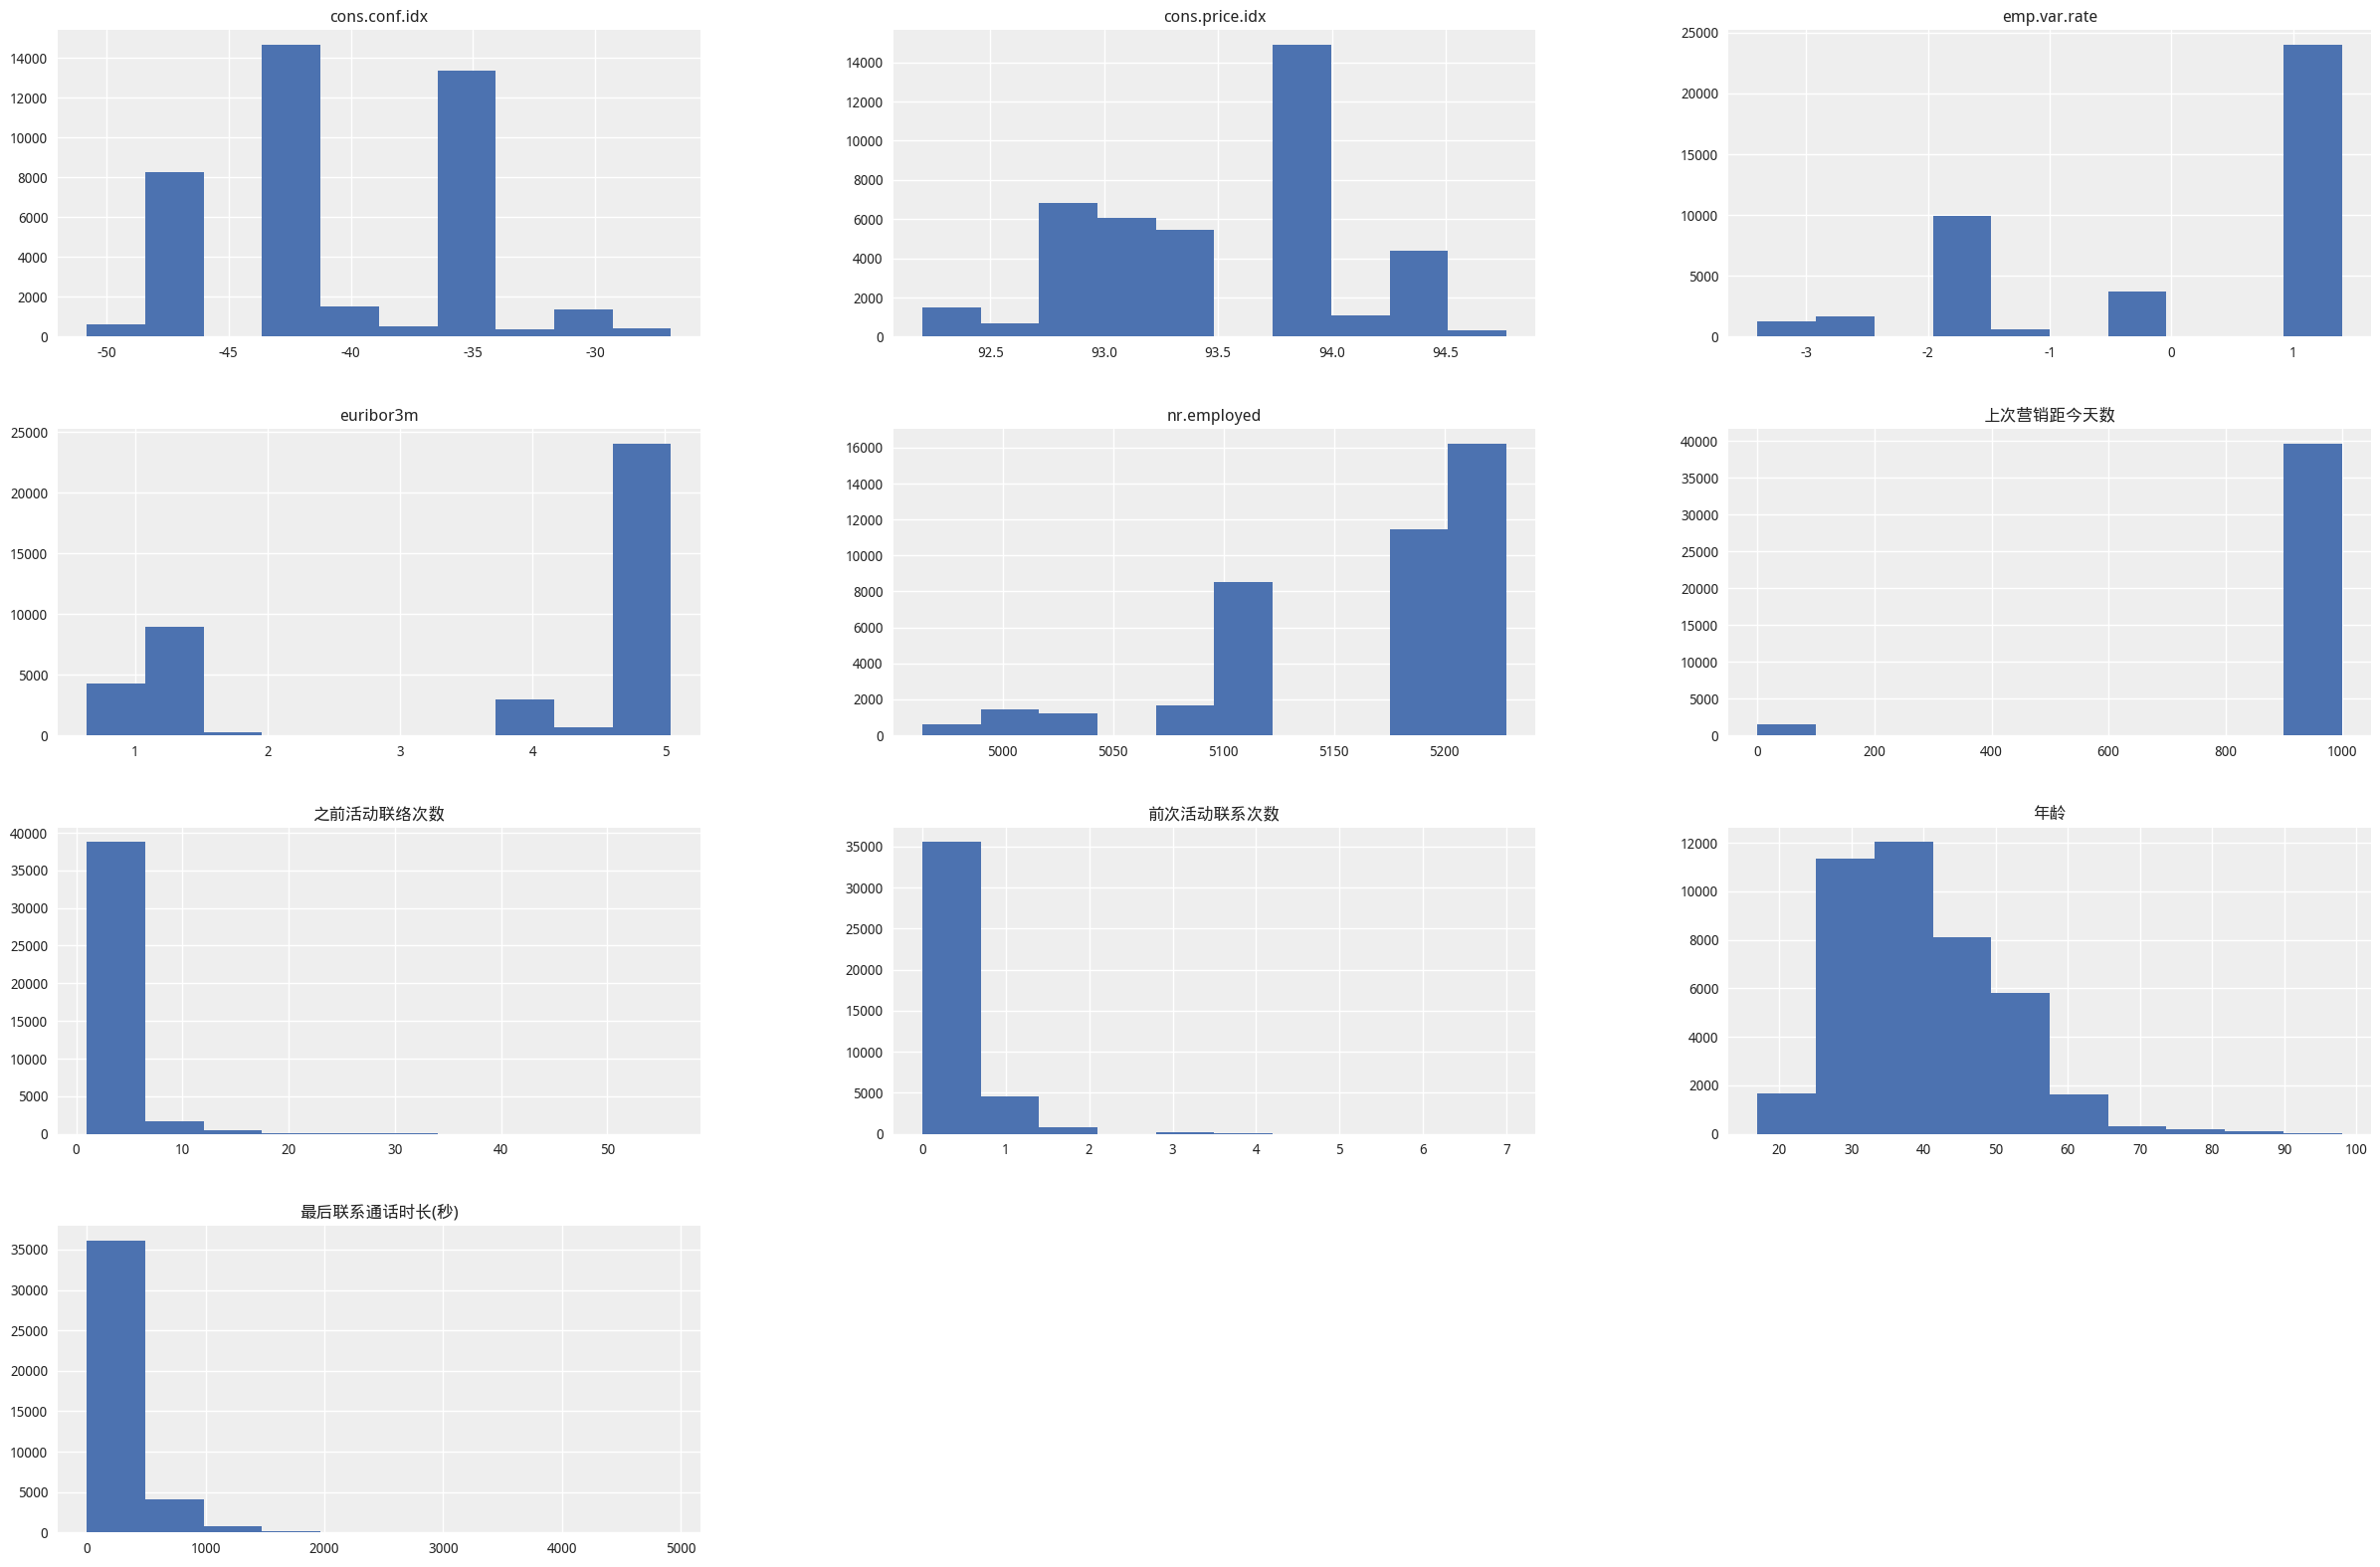

In [56]:
# 连续变量直方图 双击可以放大图形观察
# plt.rcParams['font.sans-serif']=[u'SimHei']
plt.rcParams['font.sans-serif'] = 'WenQuanYi Micro Hei' # 设置显示中文字体
plt.rcParams['font.size']=16;
DD_data_china.hist(figsize=(30,20))
plt.show()

## 矩阵散点图

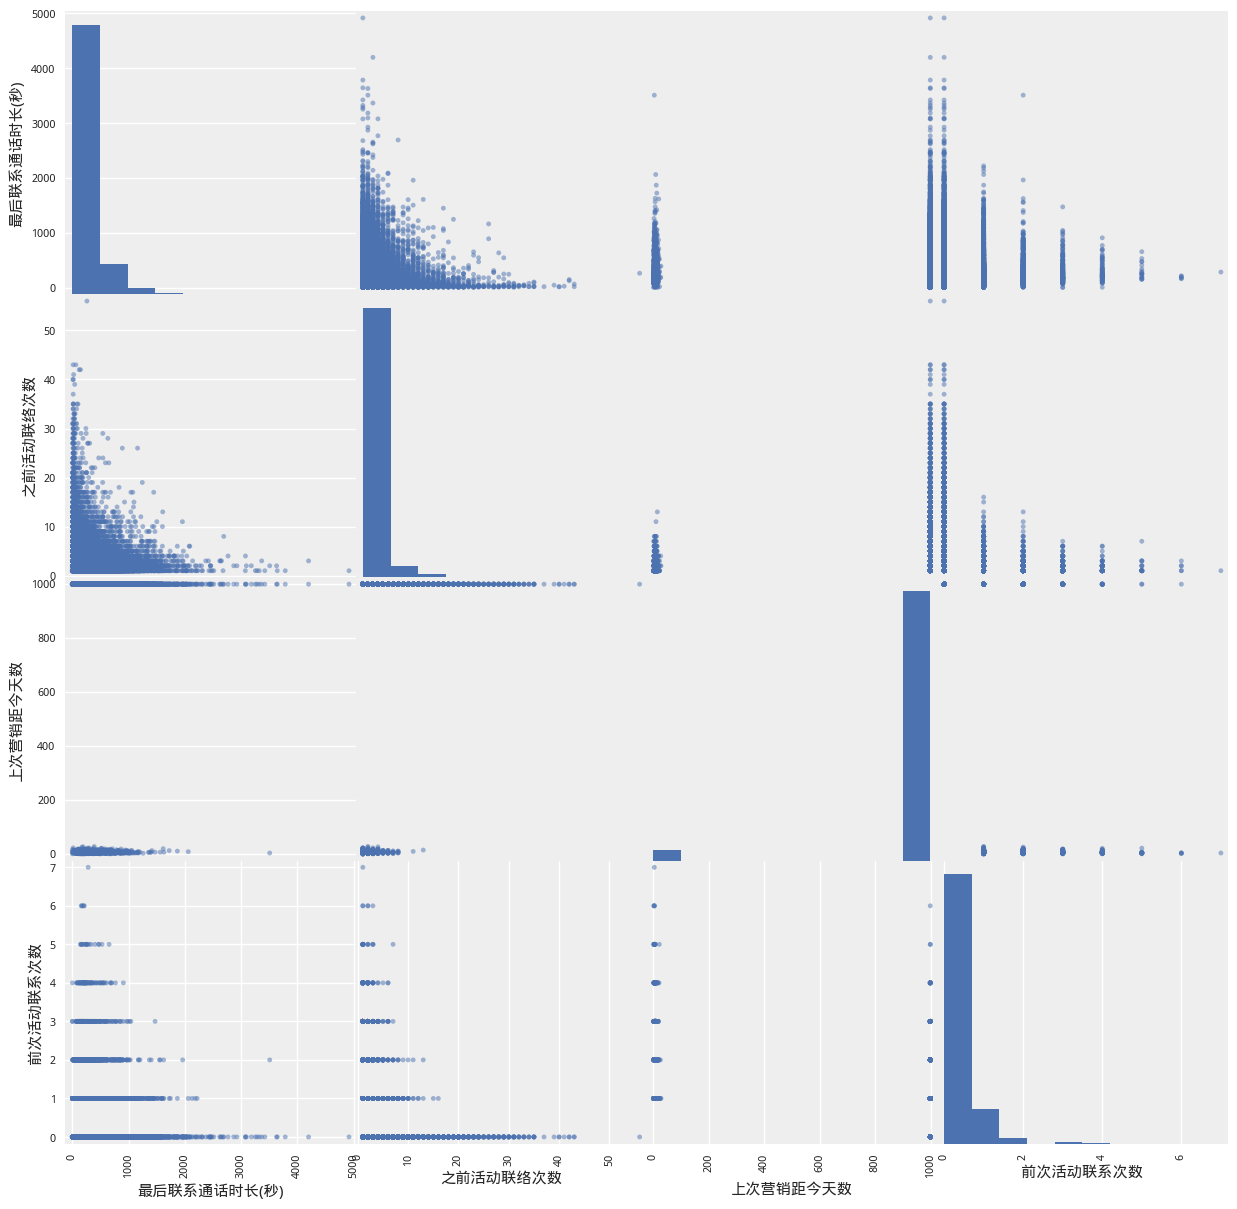

In [57]:
# 绘制矩阵散点图，比较耗资源，数据量大应该抽样或者过滤变量
# import warnings
# warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
scatter_matrix(DD_data_china[num_list[1:5]],figsize=(15,15))
# scatter_matrix(DD_data_china[num_list[1:5]], figsize=(15,10))
plt.show()

In [58]:
# 数值字段列表中加入目标字段
if "target" in num_list:
    pass
else:
    num_list.insert(0,'target')

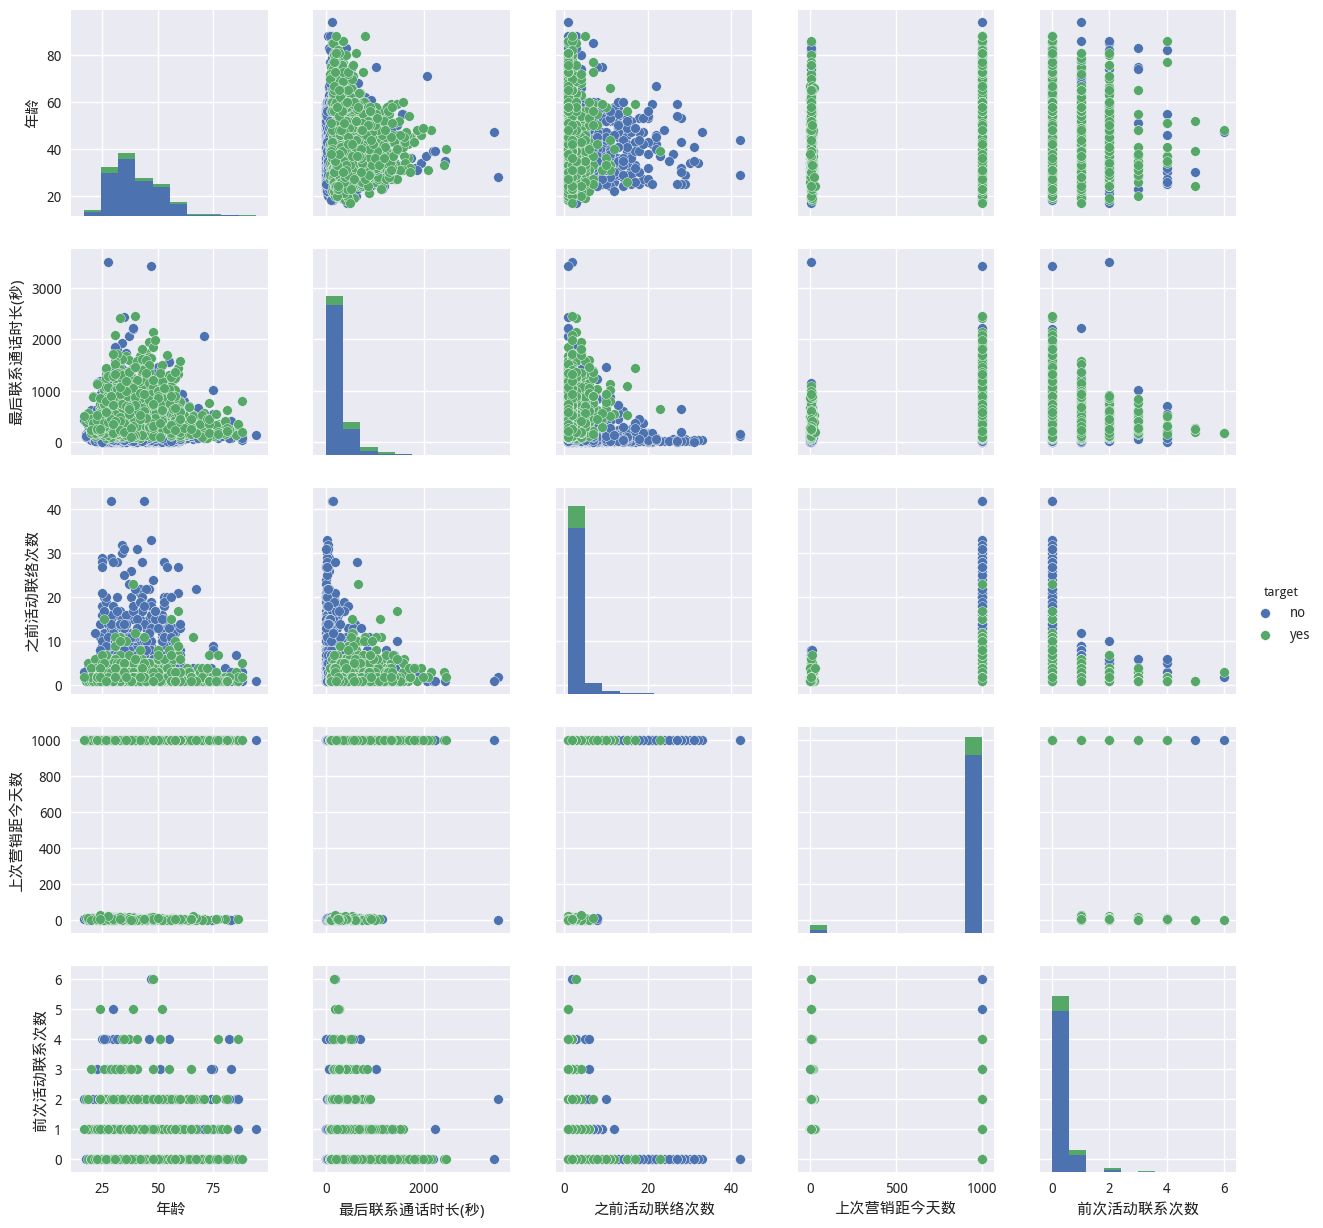

In [60]:
plt.rcParams['font.sans-serif'] = 'WenQuanYi Micro Hei'
sns.set()                        #使用默认配色
plt.rcParams['font.sans-serif'] = 'WenQuanYi Micro Hei'
sns.pairplot(DD_data_china_test[num_list[0:6]],hue="target",)   #hue 选择分类列  
plt.show()  

## 连续变量结构探查
### 平行曲线
平行曲线可以用来表现不同分组在多个连续变量上的值，通常用来观察不同组在多个连续变量上的特征。   
例如，在这里可以观察营销活动成功/不成功组在不同连续变量上的分布，观察是否有特殊模式。

In [61]:
# 数值字段列表中加入目标字段
if "target" in num_list:
    pass
else:
    num_list.insert(0,'target')

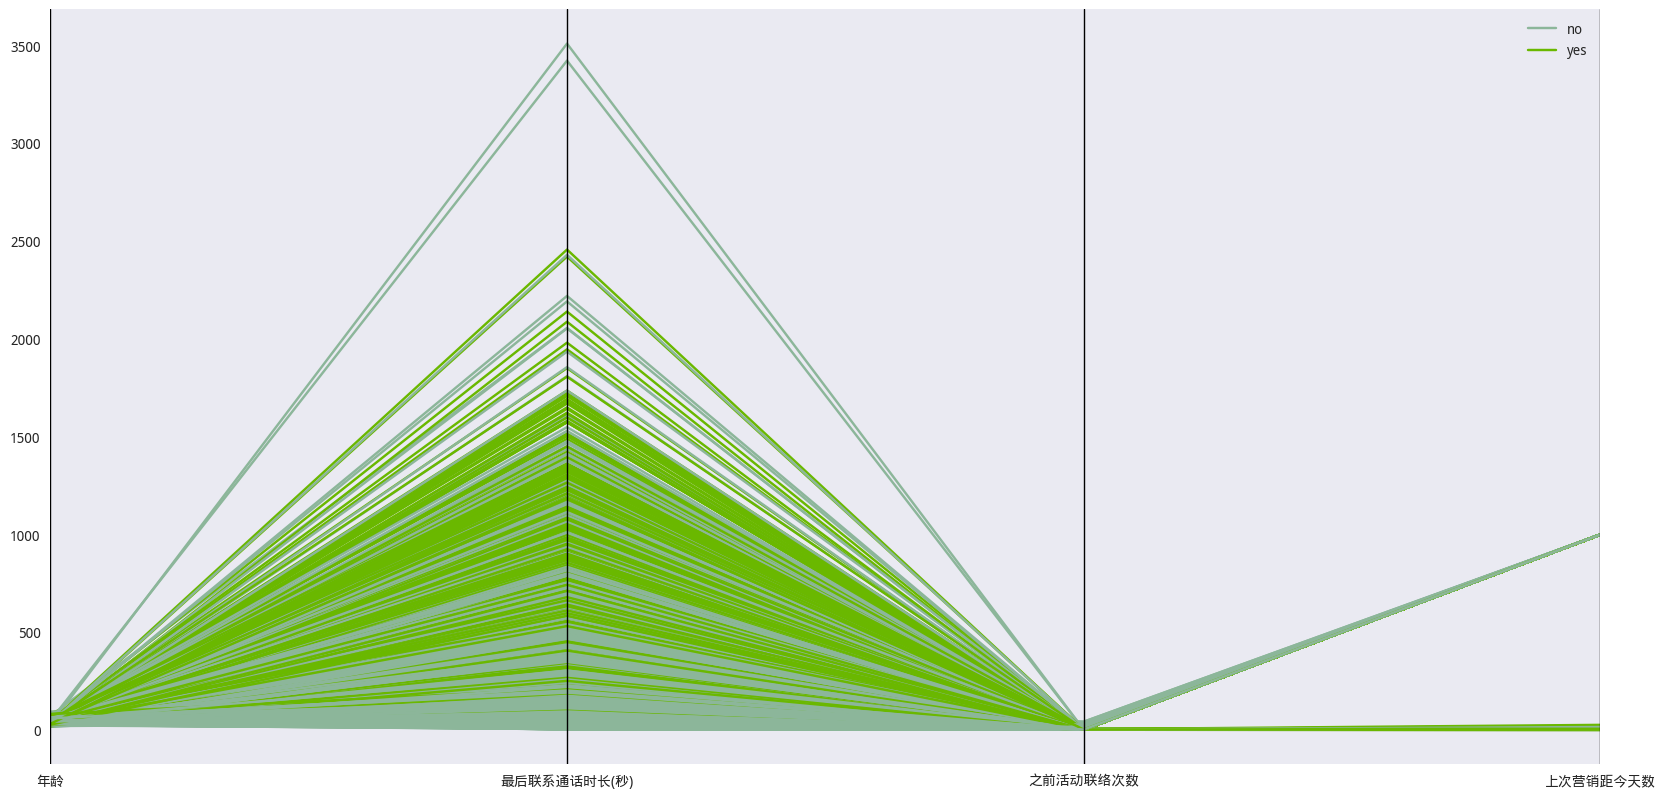

In [62]:
from pandas.plotting import parallel_coordinates
plt.Figure(); plt.rcParams["font.size"]=12 # 定义图形，设置字体
plt.rcParams["figure.figsize"]=(20,10)
parallel_coordinates(DD_data_china_test[num_list[0:5]],'target')
plt.show()

# 分类变量关系探查
分类变量之间是否存在关系的检查，比较常见的表现形式，是经常见到的交叉表或者堆叠的条形图，观察各个条形的结构是否具有足够大的差异，如果有非常大的差异，就认为两个分类变量是有连带关系的。或者更通俗一点的说，当推测某种特征时候，知道另外一种特种是有信息帮助的。  
字段数量比较多的时候，我们看到的很多报告都会陈列非常多的图，然后再逐一观察、陈述。  
对非常多的分类字段情况，如何快速判断关系最强烈的字段关系，如何比较，需要一种可以量化的指标，更高效率的方式，通常使用列联表检验技术，计算出简单的统计量，通过观察一些统计量，可以直接进行关系强度的比较和判断。一个常用的方法是列联表的卡方检验。

In [64]:
# 循环检查营销是否成功和所有分类字段之间的关系
if "target" in cat_list: cat_list.remove("target") # 前面处理分类列表中加入了目标字段，此处清除

## 卡方检验 输入交叉表矩阵，输出卡放值，p值，理论值
import numpy as np
from scipy.stats import chi2_contingency
cross_p=[]
for i in cat_list:
    table = pd.crosstab(DD_data_china.target,DD_data_china[i])
    print(i+': ',chi2_contingency(table)[1],"\n","="*100)
    cross_p.append([i,chi2_contingency(table)[1]])

工作类型:  4.189763287563861e-199 
婚姻状态:  2.068014648442211e-26 
教育等级:  3.3051890144025054e-38 
信用卡负债:  5.1619579513916376e-89 
有房贷:  0.05829447669453452 
个人贷款:  0.5786752870441754 
联系类型:  1.5259856523129964e-189 
上次联系月份:  0.0 
上次联系周几:  2.9584820052785324e-05 
前次结果:  0.0 


In [65]:
cross_p=pd.DataFrame(cross_p)
cross_p.columns=["field","P_value"] # 命名方便后续引用
cross_p.sort_values("P_value",inplace=True)
# 提取前5和是营销否成功关系较强的分类字段
cross_top5=cross_p.head(5).field 

In [66]:
## 根据之前的结果，展示和目标字段 “target” 关系强的字段，进行观察和展现

上次联系月份   apr   aug  dec   jul   jun  mar    may   nov  oct  sep
target                                                         
no      2093  5523   93  6525  4759  270  12883  3685  403  314
yes      539   655   89   649   559  276    886   416  315  256 


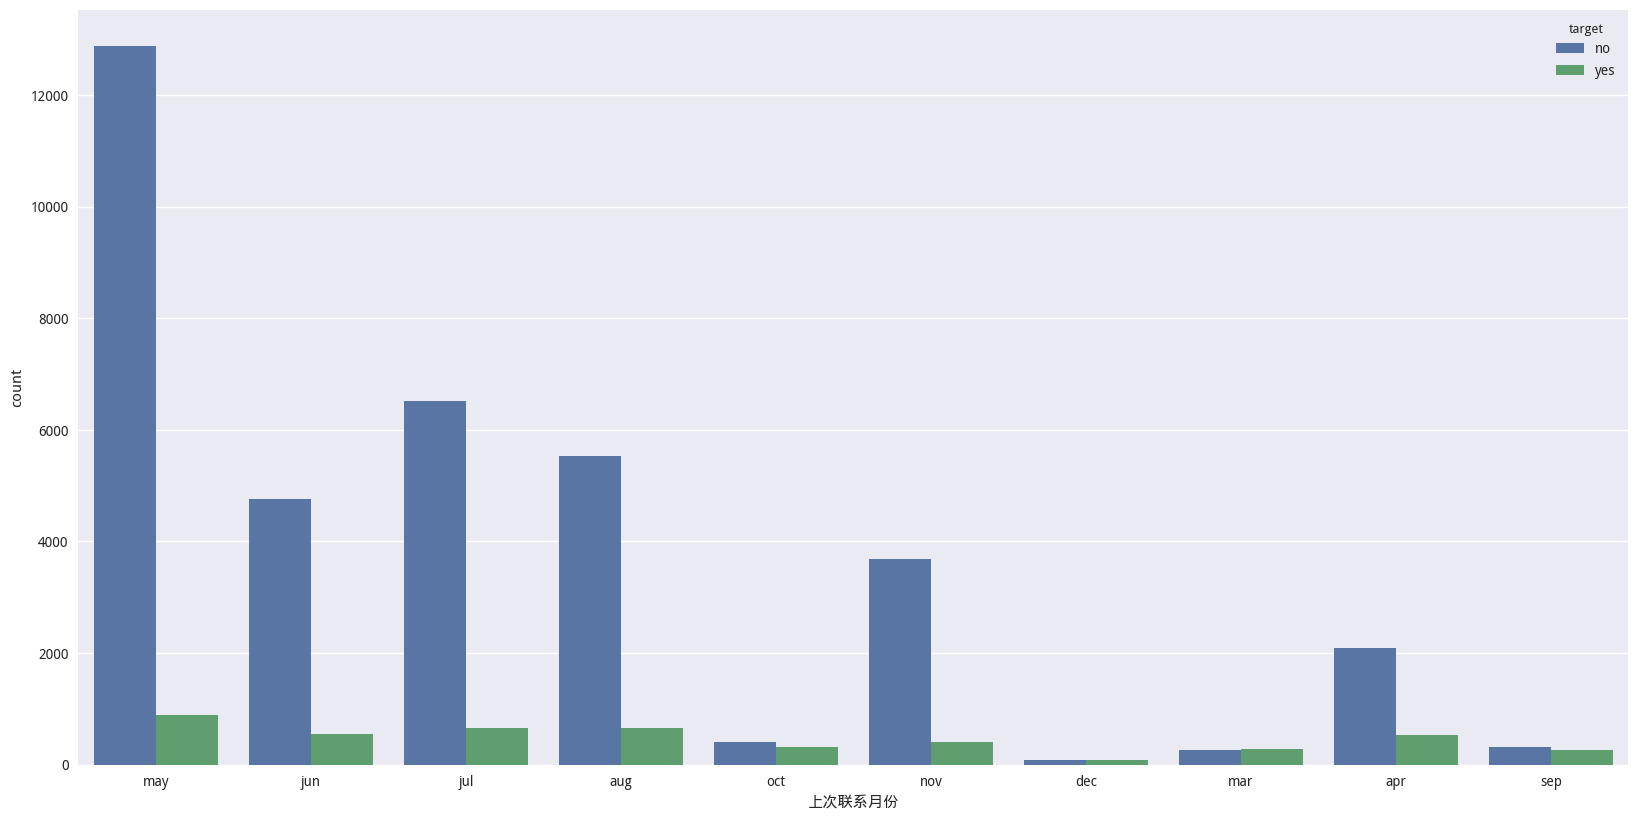

前次结果    failure  nonexistent  success
target                               
no         3647        32422      479
yes         605         3141      894 


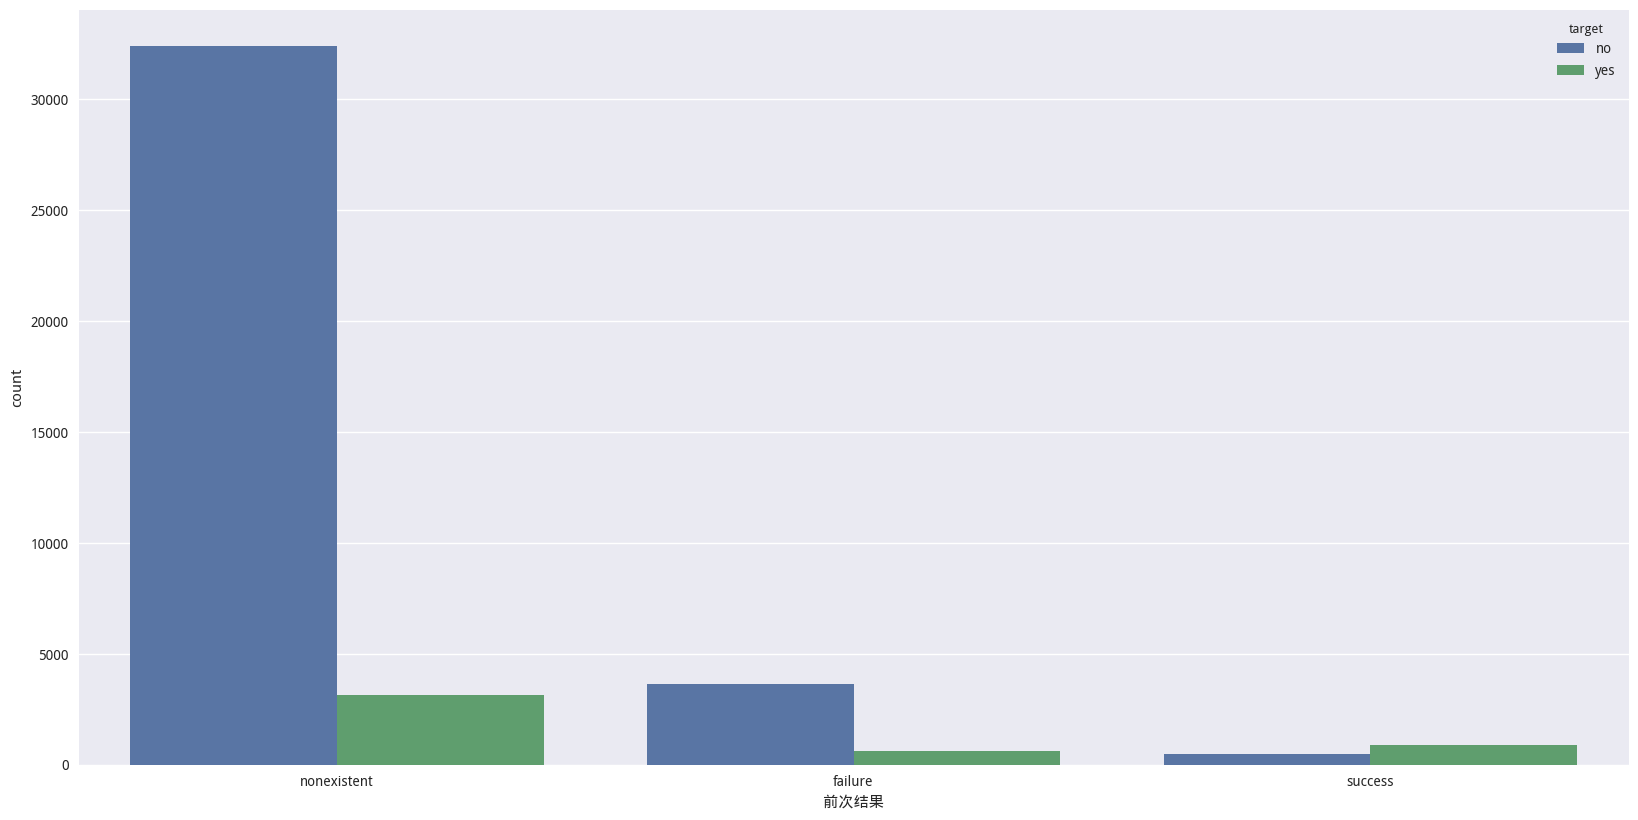

工作类型    admin.  blue-collar  entrepreneur  housemaid  management  retired  \
target                                                                      
no        9070         8616          1332        954        2596     1286   
yes       1352          638           124        106         328      434   

工作类型    self-employed  services  student  technician  unemployed  unknown  
target                                                                     
no               1272      3646      600        6013         870      293  
yes               149       323      275         730         144       37   


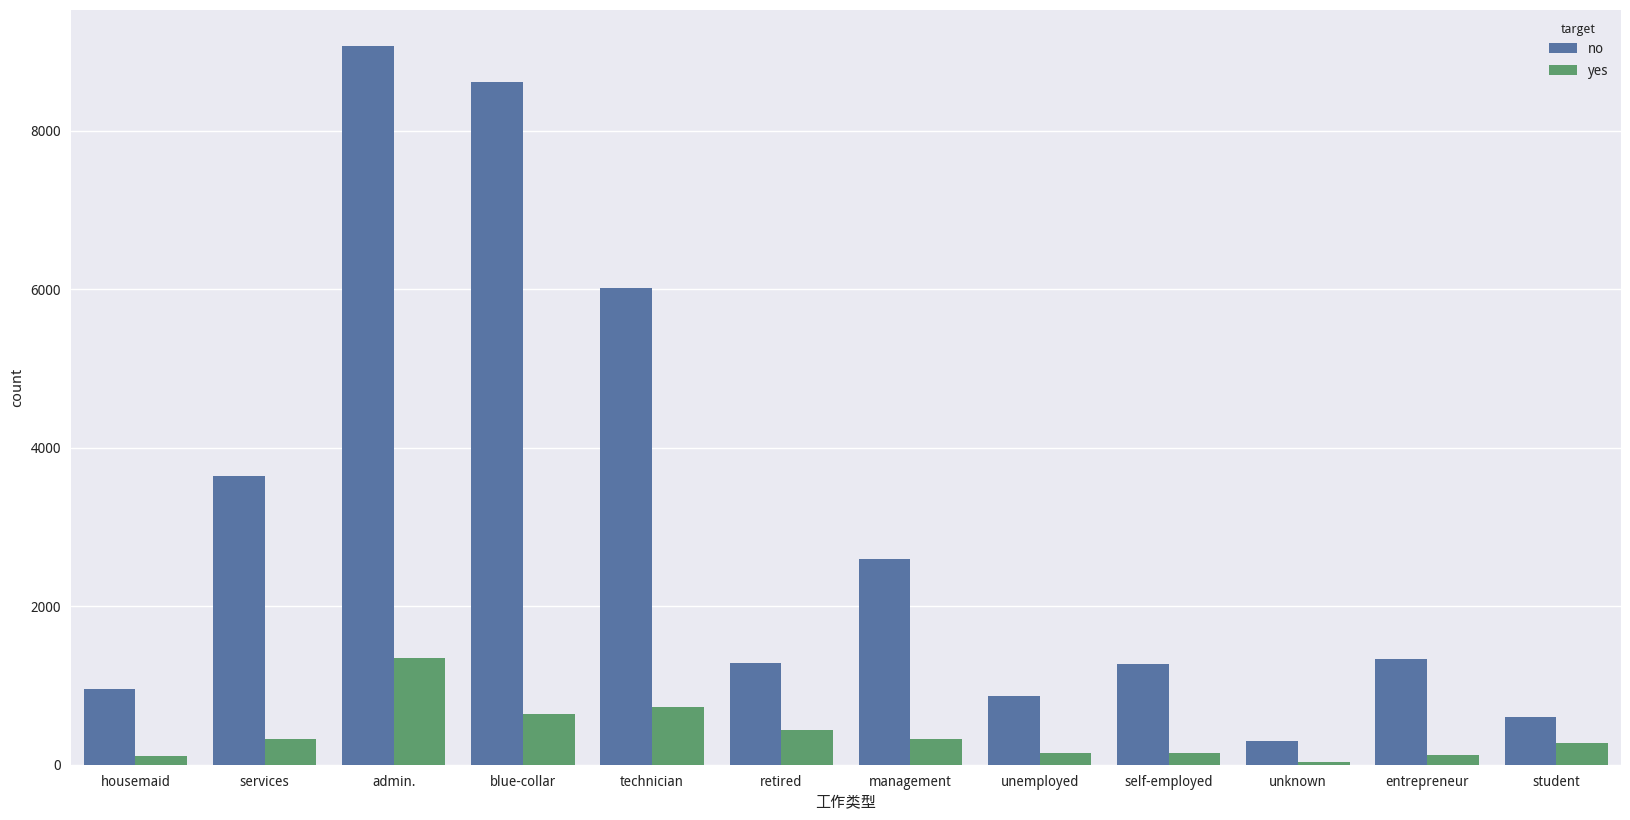

联系类型    cellular  telephone
target                     
no         22291      14257
yes         3853        787 


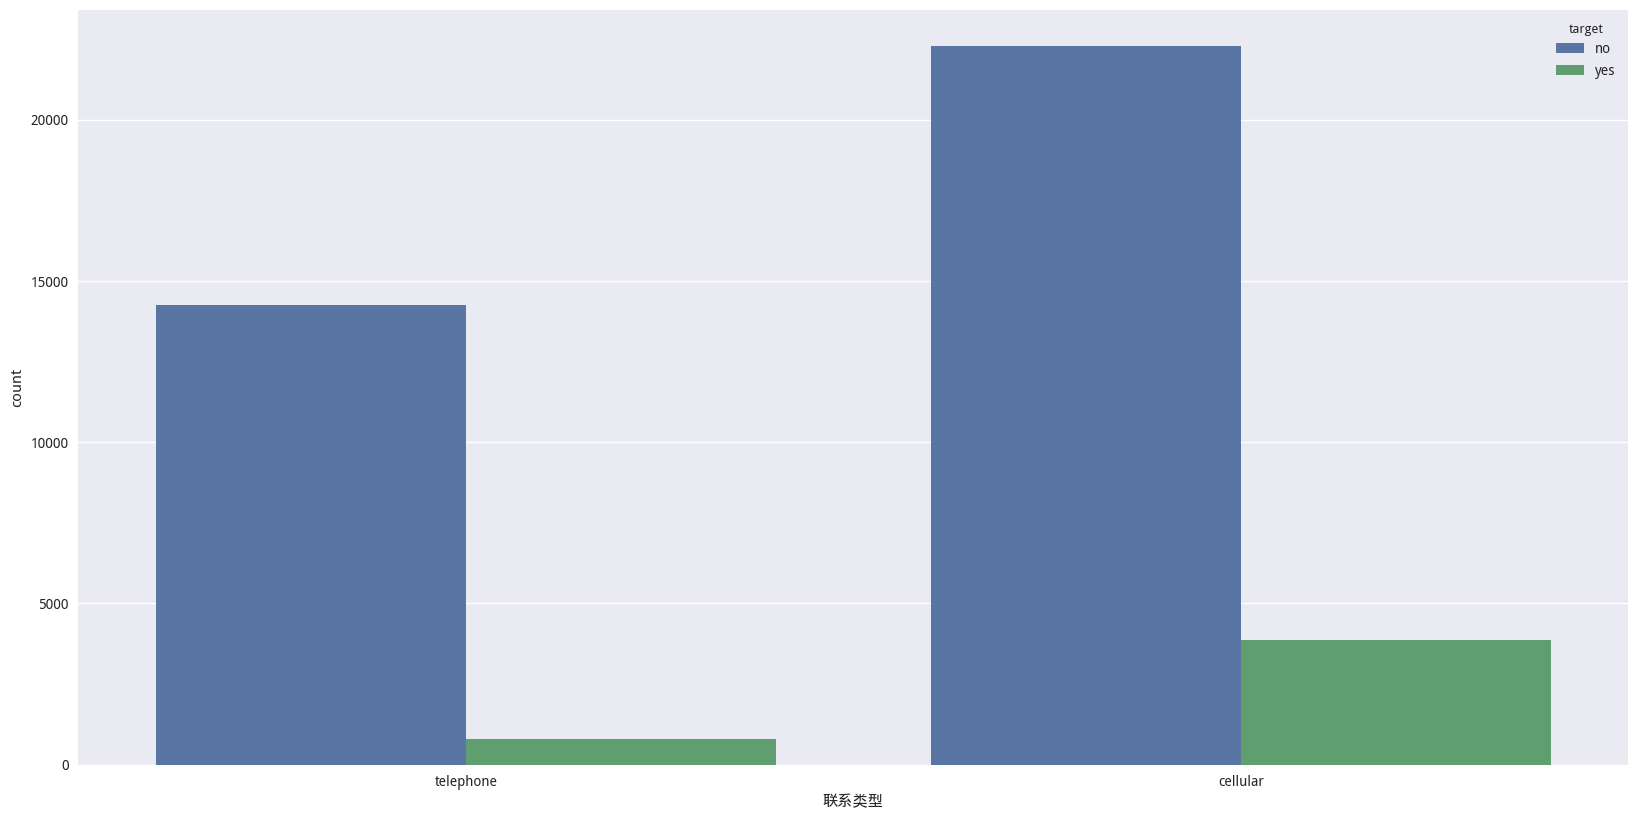

信用卡负债      no  unknown  yes
target                     
no      28391     8154    3
yes      4197      443    0 


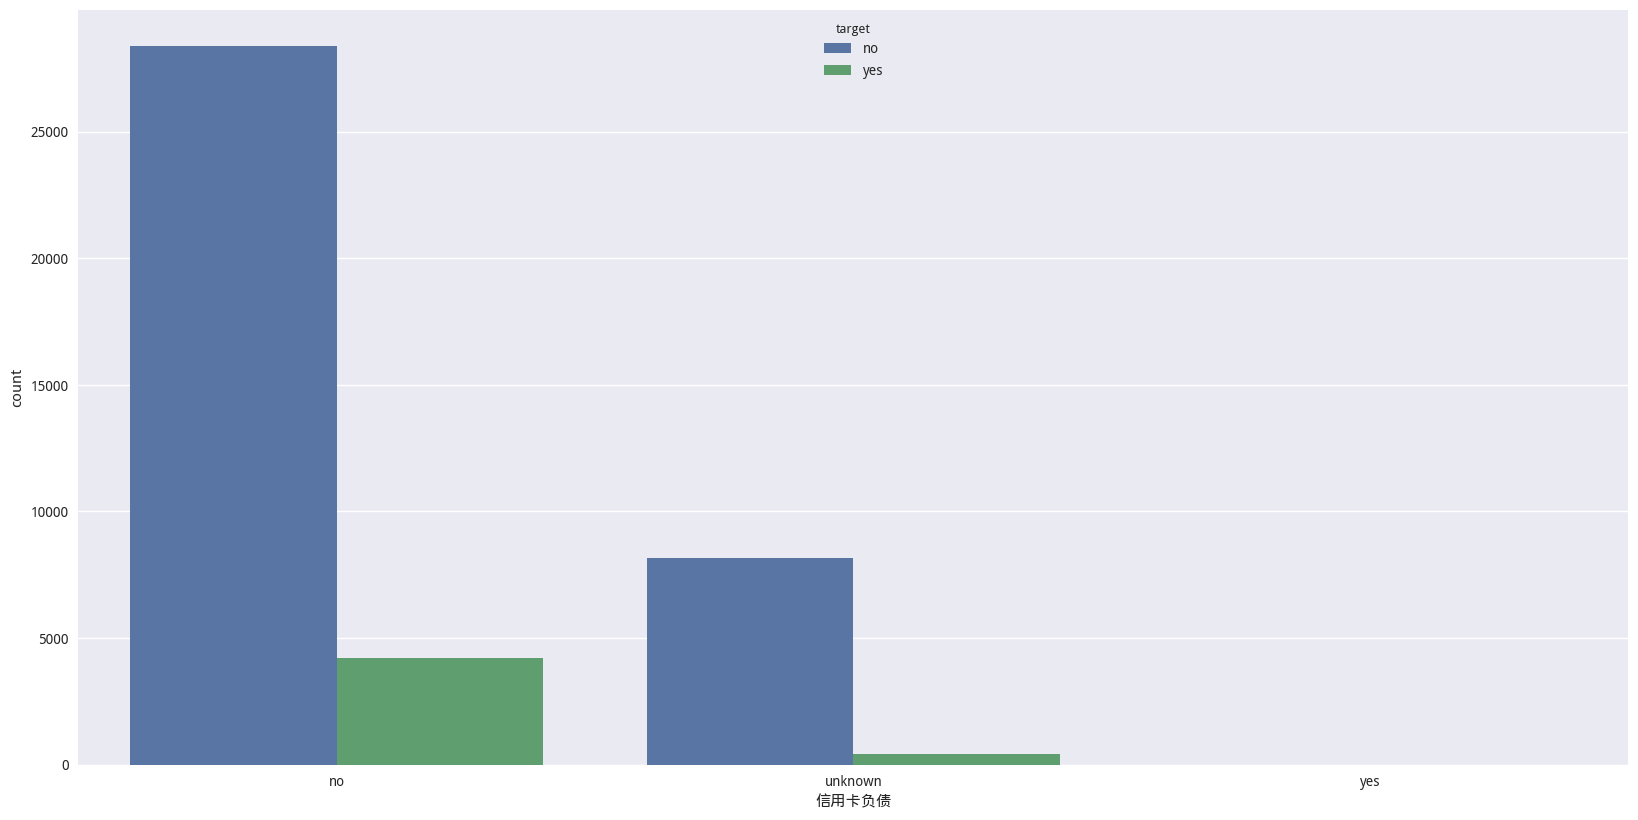

In [67]:
# 生成top_5 关联字段交叉表
for i in cross_top5:
    temp_cross_table=pd.crosstab(DD_data_china.target,DD_data_china[i])
    print(temp_cross_table,"\n","="*90)
    sns.countplot(x=i,hue="target",data=DD_data_china)
    plt.show()
    del temp_cross_table

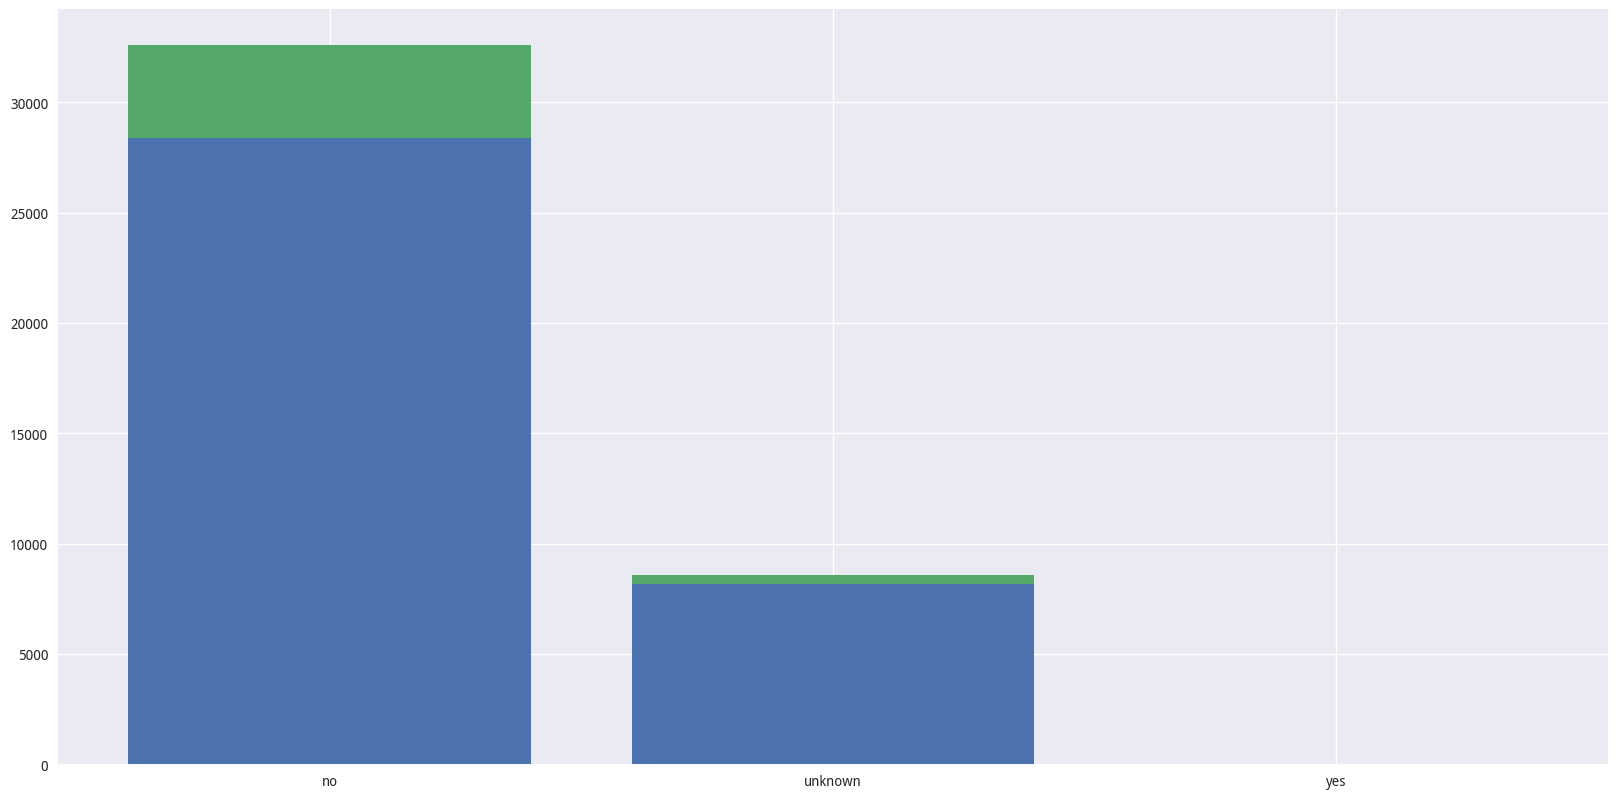

In [68]:
# 绘制堆积条形图
temp = pd.crosstab(DD_data_china.target,DD_data_china.信用卡负债)
series1=temp[0:1].values[0]
series2=temp[1:2].values[0]

plt.bar(list(temp.columns.values),series1)
plt.bar(list(temp.columns.values),series2,bottom=series1)
# plt.bar(temp2.columns,series2,bottom=series1,color="g")
plt.show()

# 数据补充信息
Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:
  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

- Title: Bank Marketing (with social/economic context)

- Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

- Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

- Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")

   The zip file includes two datasets: 
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

- Number of Instances: 41188 for bank-additional-full.csv

- Number of Attributes: 20 + output attribute.

- Attribute information:

   For more information, read [Moro et al., 2014].

# 幻灯片方式显示

In [ ]:
# 生成幻灯片文件
!jupyter-nbconvert --to slides DataDiscovery练习模板1-快速了解数据概要.ipynb --reveal-prefix  'https://cdn.bootcss.com/reveal.js/3.5.0' --output tespreport